# Alunos
Thiago Pereira Freire - 202110167

Daniel Messias Santos - 202110168

# Enunciado
João, Ana e Lídia são os únicos sócios e trabalhadores de uma empresa que produz relógios de primeira qualidade. João e Ana podem dedicar, no máximo, 40 horas por semana (cada um) à empresa, enquanto Lídia tem disponibilidade de, no máximo, 20 horas semanais.

A empresa fabrica dois tipos de relógios: relógios de pedestal (modelo antigo) e relógios de parede. Para produzir um relógio, João (que é engenheiro) monta as peças mecânicas internas do relógio, enquanto Ana (carpinteira) produz as caixas de madeira esculpidas à mão. Lídia é responsável pelas encomendas e pela remessa dos relógios. A quantidade de tempo necessária para cada uma dessas atividades está descrita a seguir.

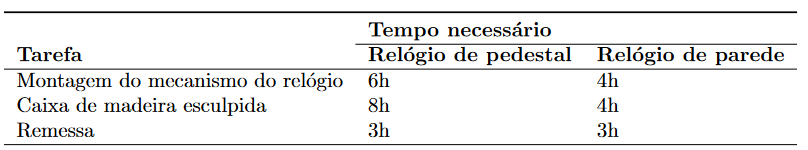

Cada relógio de pedestal construído e despachado gera um lucro de R$ 300,00, enquanto cada relógio de parede gera um lucro de R\$ 200,00. Os três sócios agora desejam determinar quantos relógios de cada tipo devem ser produzidos semanalmente para maximizar o lucro total.

# Modelagem

## Função objetivo
\begin{equation}
  max f(x,y) = 300X + 200Y
\end{equation}

## Restrições
\begin{equation}
  6X + 4Y \le 40
\end{equation}

\begin{equation}
  8X + 4Y \le 40
\end{equation}

\begin{equation}
  3X + 3Y \le 20
\end{equation}

\begin{equation}
  X, Y \ge 0
\end{equation}

## Variáveis
 X: Quantidade de relógios de pedestal

 Y: Quantidade de relógios de parede

# 1. Implementação do modelo

In [ ]:
!pip install gurobipy

In [ ]:
from gurobipy import Model, GRB

# Criar o modelo
modelo = Model("relogios")

In [ ]:
pedestal_var = modelo.addVar(name="pedestal", vtype=GRB.CONTINUOUS, lb=0)
parede_var = modelo.addVar(name="parede", vtype=GRB.CONTINUOUS, lb=0)

In [ ]:
modelo.setObjective(300 * pedestal_var + 200 * parede_var, GRB.MAXIMIZE)

In [ ]:
modelo.addConstr(6 * pedestal_var + 4 * parede_var <= 40, "tempo_montagem")
modelo.addConstr(8 * pedestal_var + 4 * parede_var <= 40, "tempo_carpintaria")
modelo.addConstr(3 * pedestal_var + 3 * parede_var <= 20, "tempo_remessa")

<gurobi.Constr *Awaiting Model Update*>

In [ ]:
modelo.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 3 rows, 2 columns and 6 nonzeros
Model fingerprint: 0x6103ff60
Coefficient statistics:
  Matrix range     [3e+00, 8e+00]
  Objective range  [2e+02, 3e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 4e+01]
Presolve time: 0.01s
Presolved: 3 rows, 2 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e+32   4.250000e+30   5.000000e+02      0s
       2    1.6666667e+03   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.02 seconds (0.00 work units)
Optimal objective  1.666666667e+03


In [ ]:
if(modelo.status == GRB.OPTIMAL):
  print("Quantidade de relógios de pedestal: " + str(pedestal_var.x))
  print("Quantidade de relógios de parede: " + str(parede_var.x))

Quantidade de relógios de pedestal: 3.333333333333333
Quantidade de relógios de parede: 3.3333333333333335


# 2. Análise de sensibilidade

In [ ]:
print("\nIntervalos de Custos (Vetor de Custos):")
for variavel in modelo.getVars():
  print(f"Variável {variavel.VarName}:")
  print(f"  lower bound do custo (SAObjLow): {variavel.SAObjLow}")
  print(f"  upper bound do custo (SAObjUp): {variavel.SAObjUp}")

print("\nIntervalos de Recursos (Vetor de Recursos):")
for restricao in modelo.getConstrs():
  print(f"Restrição {restricao.ConstrName}:")
  print(f"  lower bound do recurso (SARHSLow): {restricao.SARHSLow}")
  print(f"  upper bound do recurso (SARHSUp): {restricao.SARHSUp}")


Intervalos de Custos (Vetor de Custos):
Variável pedestal:
  lower bound do custo (SAObjLow): 200.0
  upper bound do custo (SAObjUp): 400.0
Variável parede:
  lower bound do custo (SAObjLow): 150.0
  upper bound do custo (SAObjUp): 300.0

Intervalos de Recursos (Vetor de Recursos):
Restrição tempo_montagem:
  lower bound do recurso (SARHSLow): 33.333333333333336
  upper bound do recurso (SARHSUp): inf
Restrição tempo_carpintaria:
  lower bound do recurso (SARHSLow): 26.666666666666668
  upper bound do recurso (SARHSUp): 53.33333333333333
Restrição tempo_remessa:
  lower bound do recurso (SARHSLow): 15.0
  upper bound do recurso (SARHSUp): 30.0


## Explicação

Os valores dos intervalos de custos indicam que lucro por pedestal pode variar de 200 a 400 sem afetar a solução ótima. A mesma análise pode ser feita para os relógios de parede, com o lucro podendo variar de 150 a 300 sem afetar a solução ótima.

Já para os intervalos de recursos, os valores para a restrição de tempo de montagem indicam que João pode trabalhar entre 33.33 e infinitas horas sem alterar a solução ótima do problema. Seguindo a mesma ideia, Ana pode trabalhar entre 26.6 e 53.3 horas e Lídia entre 15 e 30 horas.

# 3. Quem deve aumentar ligeiramente o tempo de trabalho?

Para aumentar o lucro total, os três sócios concordaram que um deles aumentaria ligeiramente o número máximo de horas disponíveis por semana. A escolha de qual sócio fará o aumento será baseada em qual deles resultaria no maior incremento no lucro total. Use os resultados da análise de sensibilidade para fazer essa escolha.

**Resposta:** Para aumentar o lucro, a quantidade de relógios produzidos semanalmente precisa aumentar. Como João pode aumentar seu tempo de trabalho até infinito sem alterar na quantidade de relógios montados, ele é excluido imediatamente da análise. Para aumentar o lucro total, Ana deveria passar a trabalhar no mínimo 53.3 horas, enquanto Lídia deve trabalhar no mínimo 30 horas. Como o total de horas trabalhadas atual é, respectivamente, 40 e 20, Lídia está mais próxima do tempo mínimo necessário para aumentar o lucro, sendo 10 horas de diferença.


# 4. Existe alguma variável dual igual a zero? O que significa ter uma variável dual igual a zero?

Ter uma variável dual igual a zero significa que a restrição associada a essa variável não está ativa, ou seja, não altera o resultado do problema. Nesse problema, temos uma variável dual igual a zero pelo fato de que existe a possibilidade de aumentar infinitamente a quantidade de horas trabalhadas por Ana sem que isso afete a solução do problema.
